Mikko Peltola

# Methods 8 -  Text analytics
Our task is to perform text analytics for sentiment analysis. One problem I suspect we might encounter is the fact that the language used might be slightly old-fashioned for the positive and negative lists and the stopword list we are about to use in this exercise.
<br><br>
My work of choice is the poem *Inferno* by Dante Alighieri, as translated by Henry Wadsworth Longfellow. *Inferno* is specifically chosen since I have read it a few times and thus may use my knowledge in evaluating our results. It might also be interesing, since as the poem progresses, the reader delves deeper and deeper into Hell, which should be clearly indicated by our results as a general decrease in positivity.

## Libraries

In [150]:
import numpy as np
from matplotlib import pyplot as plt

import urllib.request

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import os, math

#### This was run only once to download the nltk packages

In [151]:
#nltk.download()

## Load book and split into paragraphs
I have preprocessed the file by removing the table of contents and publisher information by hand.
<br><br>
We define functions to split the poem into verses and cantos. Two of each will be displayed for demonstration purposes.
<br><br>
Also our lists for stopwords, positives and negatives are loaded here.

In [152]:
stopwords = stopwords.words('english')
pos = open("C:\\Users\\micromikko\\AnacondaProjects\\data\\positive-words.txt", "r").read().split()
neg = open("C:\\Users\\micromikko\\AnacondaProjects\\data\\negative-words.txt", "r").read().split()

file_path = "C:\\Users\\micromikko\\AnacondaProjects\\data\\inferno.txt"

def split_into_verses(path):
    minlength = 5
    text = open(path, "r", encoding="utf8").read()
    
    verses = text.split(sep="\n\n")

    for verse in verses:
        if verse.startswith("Inferno: Canto ") or len(verse) < minlength:
            verses.remove(verse)
                
    return verses

def split_into_cantos(path):
    text = open(path, "r", encoding="utf8").read()

    cantos = text.split(sep="Inferno: Canto ")

    #first element is deleted as it is empty
    del cantos[0]
    
    return cantos

verses = split_into_verses(file_path)
cantos = split_into_cantos(file_path)

print("Number of verses in the poem: {}\n".format(len(verses)))
for i in range(2):
    print("{}\n-----".format(verses[i]))
    
print("\n\nNumber of cantos in the poem: {}\n".format(len(cantos)))
for i in range(2):
    print("{}\n-----".format(cantos[i]))

Number of verses in the poem: 1629


Midway upon the journey of our life
  I found myself within a forest dark,
  For the straightforward pathway had been lost.
-----
Ah me! how hard a thing it is to say
  What was this forest savage, rough, and stern,
  Which in the very thought renews the fear.
-----


Number of cantos in the poem: 34

I


Midway upon the journey of our life
  I found myself within a forest dark,
  For the straightforward pathway had been lost.

Ah me! how hard a thing it is to say
  What was this forest savage, rough, and stern,
  Which in the very thought renews the fear.

So bitter is it, death is little more;
  But of the good to treat, which there I found,
  Speak will I of the other things I saw there.

I cannot well repeat how there I entered,
  So full was I of slumber at the moment
  In which I had abandoned the true way.

But after I had reached a mountain's foot,
  At that point where the valley terminated,
  Which had with consternation pierced my heart,


# Canto level inspection

## Transforming the text further
Each canto is handled individually and the results (positive, negative, neutral and total words) are saved in an array that is passed on. The **part_sentiment()** function is run through all the 34 cantos and the sentiments gathered.

In [153]:
def part_sentiment(part, pos, neg, sw):
    individual_words = part.split()
    individual_words = [word.lower() for word in individual_words if word.isalpha()]

    for word in individual_words:
        if word in sw:
            individual_words.remove(word)

    for word in individual_words:
        if word in sw:
            individual_words.remove(word)

    lemmatizer = WordNetLemmatizer()

    for i in range(len(individual_words)):
        individual_words[i] = lemmatizer.lemmatize(individual_words[i])

    counts = np.zeros(4)
    
    for word in individual_words:
        counts[3] += 1
        if word in pos:
            counts[0] += 1
        elif word in neg:
            counts[1] += 1
        else:
            counts[2] += 1
    
    return counts;

cantos_sentiments = []

for canto in cantos:
    cantos_sentiments.append(part_sentiment(canto, pos, neg, stopwords))

cantos_sentiments = np.asarray(cantos_sentiments)

cpositive = cantos_sentiments[:, 0]
cnegative = cantos_sentiments[:, 1]
cneutral = cantos_sentiments[:, 2]
ctotal = cantos_sentiments[:, 3]

## Plotting the positive and negative word counts in each canto

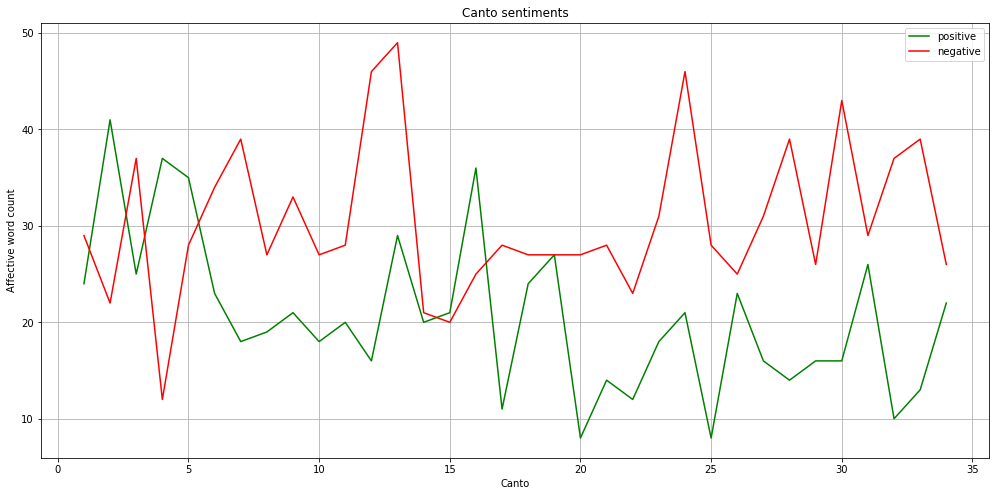

In [154]:
x = np.arange(1, len(cantos)+1)

plt.figure(figsize=(17, 8))
plt.plot(x, cpositive, "g-", label="positive")
plt.plot(x, cnegative, "r-", label="negative")
plt.title("Canto sentiments")
plt.xlabel("Canto")
plt.ylabel("Affective word count")
plt.legend()
plt.grid()
plt.show()

# Verse level inspection

## Transforming the text further

In [155]:
verses_sentiments = []

for verse in verses:
    verses_sentiments.append(part_sentiment(verse, pos, neg, stopwords))

verses_sentiments = np.asarray(verses_sentiments)

vpositive = verses_sentiments[:, 0]
vnegative = verses_sentiments[:, 1]
vneutral = verses_sentiments[:, 2]
vtotal = verses_sentiments[:, 3]

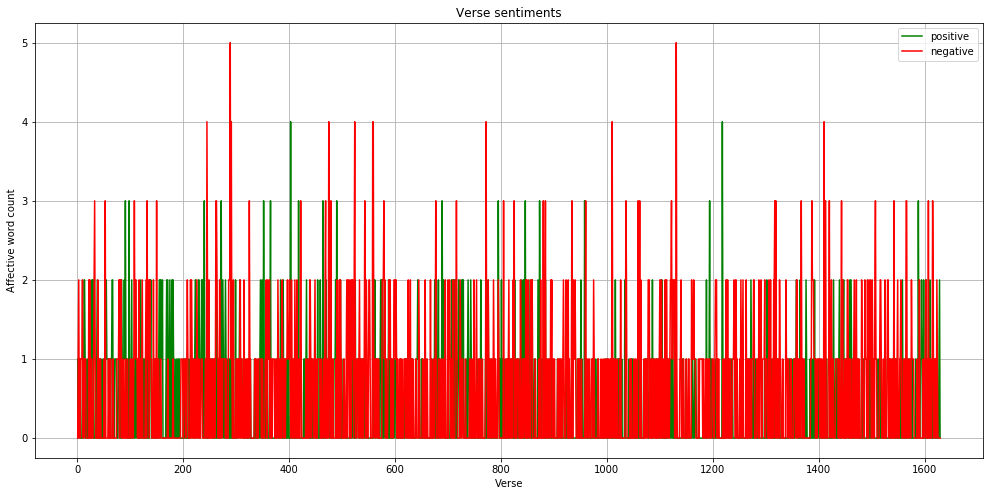

In [156]:
x = np.arange(1, len(verses)+1)

plt.figure(figsize=(17, 8))
plt.plot(x, vpositive, "g-", label="positive")
plt.plot(x, vnegative, "r-", label="negative")
plt.title("Verse sentiments")
plt.xlabel("Verse")
plt.ylabel("Affective word count")
plt.legend()
plt.grid()
plt.show()

## Implementation of running average
We will implement a running average to clear up our verse level sentiment plot. This allows us to see the variation in sentiment more clearly.

In [157]:
def running_average(affect):
    runner = len(affect)//5
    list = []
    
    for i in range(0, len(affect)-runner):
        list.append(np.mean(affect[i:i+runner]))
    
    list = np.asarray(list)
    
    return list

def run_affects(pos, neg, neut):
    runpos = running_average(pos)
    runneg = running_average(neg)
    runneut = running_average(neut)
    
    return (runpos, runneg, runneut)
    
rvpos, rvneg, rvneut = run_affects(vpositive, vnegative, vneutral)

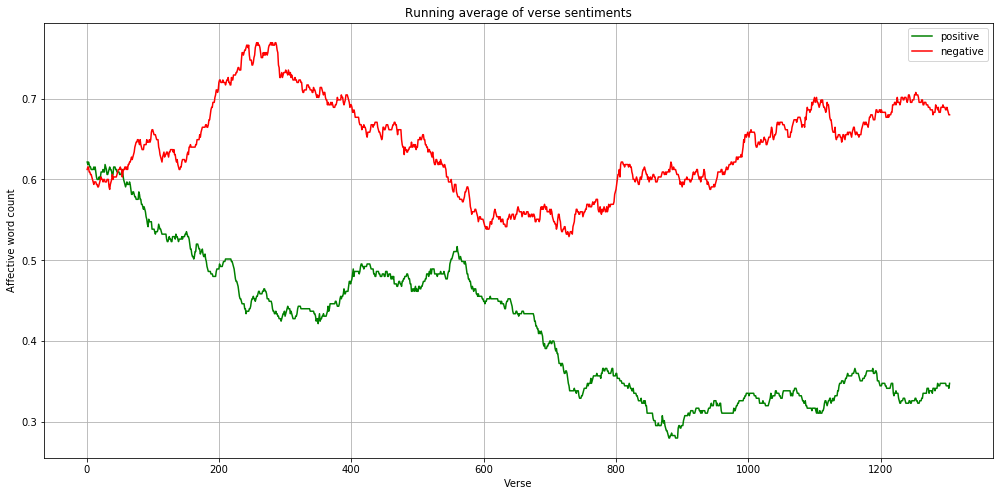

In [158]:
x = np.arange(1, len(rvpos)+1)

plt.figure(figsize=(17, 8))
plt.plot(x, rvpos, "g-", label="positive")
plt.plot(x, rvneg, "r-", label="negative")
plt.title("Running average of verse sentiments")
plt.xlabel("Verse")
plt.ylabel("Affective word count")
plt.legend()
plt.grid()
plt.show()

## Inspection of absolute affect
To inspect the absolute affect of our running positive and negative, we subtract the negative sentiments from the corresponding sentiments.

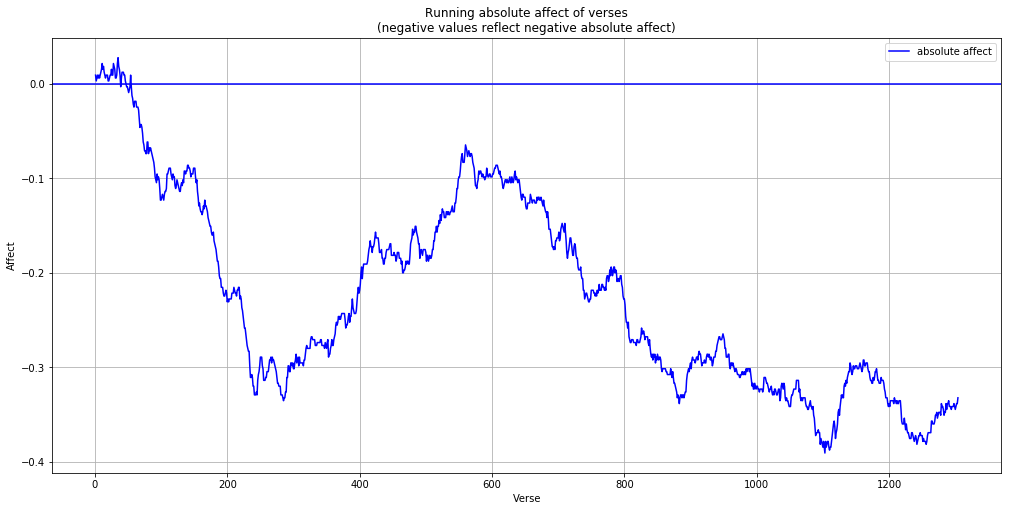

In [159]:
def absolute_affect_level(pos, neg, neut):
    rvpos, rvneg, rvneut = run_affects(pos, neg, neut)
    abs_affect = rvpos - rvneg
    return abs_affect

abs_affect = absolute_affect_level(vpositive, vnegative, vneutral)

x = np.arange(1, len(abs_affect)+1)

plt.figure(figsize=(17, 8))
plt.plot(x, abs_affect, "b-", label="absolute affect")
plt.axhline(0, color='blue')

plt.title("Running absolute affect of verses\n(negative values reflect negative absolute affect)")
plt.xlabel("Verse")
plt.ylabel("Affect")
plt.legend()
plt.grid()

plt.show()

## Finally we normalize the absolute affect level, the positive and the negative affects
By normalizing all of our affect measurements we may clearly inspect them in the same graph.
<br><br>
Even though our affect assesments are to a certain degree somewhat accurate, we can clearly see that the positive and negative word libraries are not well suited for works as old as Dante's Inferno. The affect count in either way is too low, which means that the affect libraries do not have all of the necessary words for our purpose.
<br><br>
Our graphs also reveal that picking out individual words and assigning it as *positive* or *negative* is a poor way of determining affect in general. By inspecting the part between verses 400 and 800 we observe a curious hump which is significantly more positive than its surroundings. In reality the tone of these verses is far from positive, as they are from cantos which touch on thieves and resellers of holy relics and the like. The words "holy", "saint" (e.g. x relic of saint somebody), and other positively connotated words appear very frequently, but their context is entirely negative, which is the main reason for our curious bump.
<br><br>
Aside from that, we can observe a general decline in positivity throughout the poem, which would be an accurate assessment.

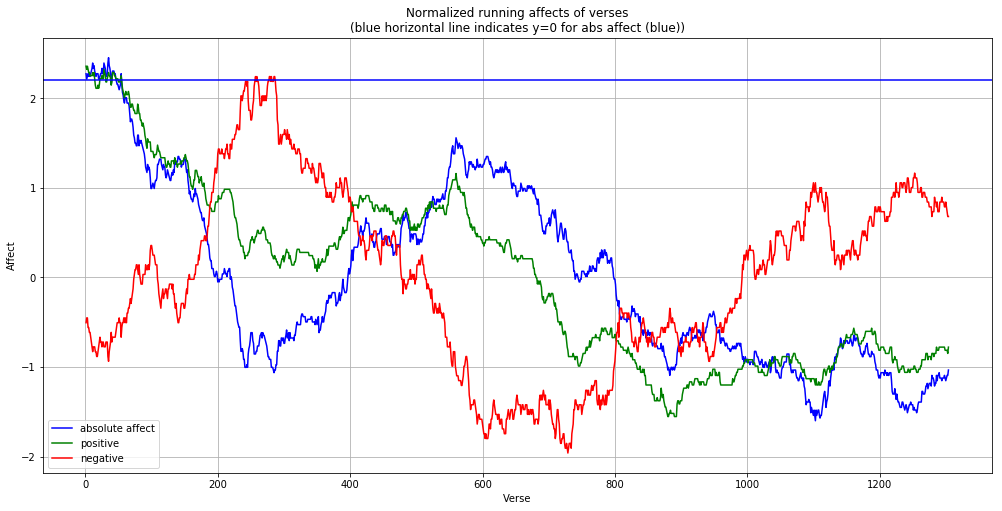

In [160]:
x = np.arange(1, len(abs_affect)+1)


abs_affect = (abs_affect - np.mean(abs_affect)) / np.std(abs_affect)
rvpos = (rvpos - np.mean(rvpos)) / np.std(rvpos)
rvneg = (rvneg - np.mean(rvneg)) / np.std(rvneg)

plt.figure(figsize=(17, 8))
plt.plot(x, abs_affect, "b-", label="absolute affect")
plt.plot(x, rvpos, "g-", label="positive")
plt.plot(x, rvneg, "r-", label="negative")
plt.axhline(2.2, color='blue')

plt.title("Normalized running affects of verses\n(blue horizontal line indicates y=0 for abs affect (blue))")
plt.xlabel("Verse")
plt.ylabel("Affect")
plt.legend()
plt.grid()

plt.show()

### *Thence we came forth to rebehold the stars.*